In [1]:
import spot, buddy
spot.setup()
import random
from IPython.display import display
import WBA_utils
from copy import deepcopy as deepcopy
import time

# Problematic cases

## 1 "Broken" loop needed for trace

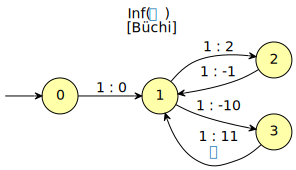

'tsbrg'

In [2]:
hoa1str = """HOA: v1
States: 4
Start: 0
AP: 1 "a"
acc-name: generalized-Buchi 1
Acceptance: 1 Inf(0)
name: "loop for trace"
--BODY--
State: 0
[t] 1 <0>
State: 1
[t] 2 <2>
[t] 3 <-10>
State: 2
[t] 1 <-1>
State: 3
[t] 1 <11> {0}
--END--"""
aut1 = spot.automaton(hoa1str)
display(aut1, "tsbrg")

Original automaton


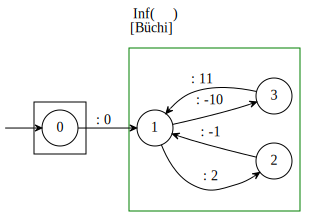

Prefix energy per state
array('q', [0, 40, 40, 30])
Current optimal predescessor
array('Q', [0, 5, 2, 3])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


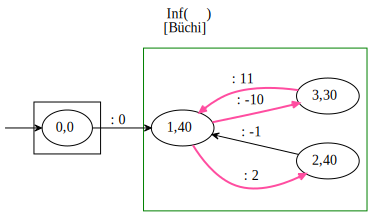

Checking SCC 0
Degeneralized SCC has: 3 states, 4 edges and 1 back-edges.
Current SCC with: 3 states and 1 back-edges
{1: 0, 2: 1, 3: 2}


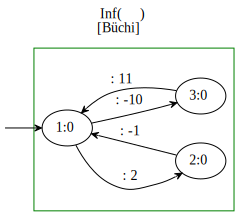

Analysing backedge 3:0 -> 1:0.
We start with 40 energy in state 1:0.
array('q', [40, 40, 30]) array('Q', [0, 1, 2])
We found a non-negative loop using edge 3:0 -> 1:0 directly.


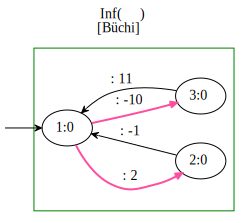

aut1 has loop:  True


In [3]:
print("aut1 has loop: ", WBA_utils.BuechiEnergy(aut1, 0, 40, 0, 2)) 

Here the energies are correctly computed (second figure), however the loop (1,2,1) does "no longer exist",
as it was interrupted by the loop (1,3,1) -> Hard for trace finding!

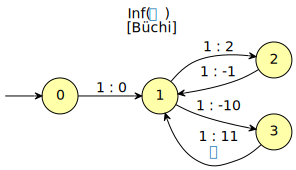

'tsbrg'

Iter 0
array('Q', [0, 4, 2, 0])


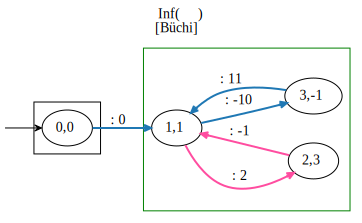

After pump 1


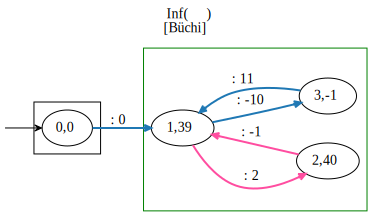

Iter 2
array('Q', [0, 5, 2, 3])


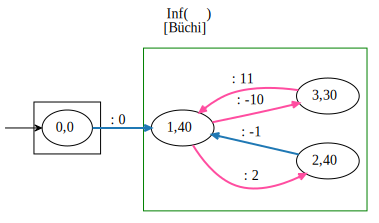

{'n_backedges': 0, 'n_bf_iter': 2, 'n_scc': 0, 'n_pump_loop': 1, 'n_propagate': 16}


In [4]:
def display_c(aut, opt=""):
    display(aut.show(opt))
    return

def highlight_c(aut, en, pred, opt=""):
    aut.set_state_names([f"{i},{ei}" for i, ei in enumerate(en)])
    aut.highlight_edges((aut.num_edges()+1)*[True], 0)
    aut.highlight_edges([i for i in pred if i != 0], 1)
    display_c(aut, opt)

aut1 = spot.automaton(hoa1str)
display(aut1, "tsbrg")

WBA_utils.reset_stats()
aut1_comp = WBA_utils.mod_BF_iter(aut1)
for i, (e,p) in enumerate(aut1_comp.FindMaxEnergyGen(0, 40, 0)):
    print(f"Iter {i}" if (i%2==0) else f"After pump {i}")
    if i%2 == 0:
        print(p)
    highlight_c(aut1, e, p, "tsbrg")
print(WBA_utils.get_stats())

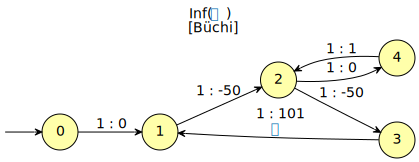

'tsbrg'

In [5]:
hoa2str = """HOA: v1
States: 5
Start: 0
AP: 1 "a"
acc-name: generalized-Buchi 1
Acceptance: 1 Inf(0)
name: "incorrect energy"
--BODY--
State: 0
[t] 1 <0>
State: 1
[t] 2 <-50>
State: 2
[t] 3 <-50>
[t] 4 <0>
State: 3
[t] 1 <101> {0}
State: 4
[t] 2 <1>
--END--"""
aut2 = spot.automaton(hoa2str)
display(aut2, "tsbrg")

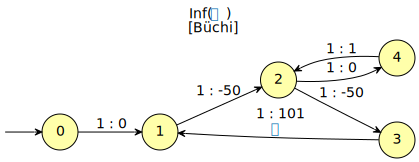

'tsbrg'

Iter 0
array('Q', [0, 1, 6, 0, 4])


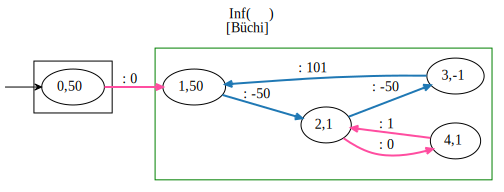

After pump 1


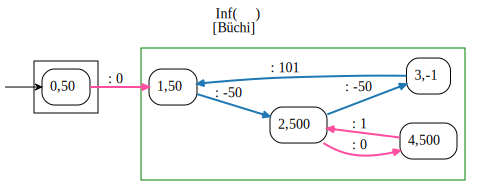

Iter 2
array('Q', [0, 5, 6, 3, 4])


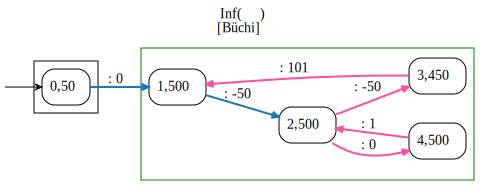

{'n_backedges': 0, 'n_bf_iter': 2, 'n_scc': 0, 'n_pump_loop': 1, 'n_propagate': 14}


In [6]:
aut2 = spot.automaton(hoa2str)
display(aut2, "tsbrg")

WBA_utils.reset_stats()
aut2_comp = WBA_utils.mod_BF_iter(aut2)
for i, (e,p) in enumerate(aut2_comp.FindMaxEnergyGen(0, 500, 50)):
    print(f"Iter {i}" if (i%2==0) else f"After pump {i}")
    if i%2 == 0:
        print(p)
    highlight_c(aut2, e, p, "tsbrg")
print(WBA_utils.get_stats())

When looping (1,2,3,1) we need to take the nested loop on (2,4,2) in order to attain WUP on 2

Also, following the predescessors does not necessarily lead to the initial state as can be seen above

## Another interesting case

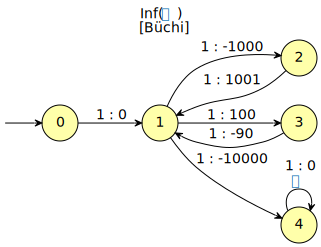

'tsbrg'

In [10]:
hoa3str = """HOA: v1
States: 5
Start: 0
AP: 1 "a"
acc-name: generalized-Buchi 1
Acceptance: 1 Inf(0)
name: "loop for trace"
--BODY--
State: 0
[t] 1 <0>
State: 1
[t] 2 <-1000>
[t] 3 <100>
[t] 4 <-10000>
State: 2
[t] 1 <1001>
State: 3
[t] 1 <-90>
State: 4
[t] 4 <0> {0}
--END--"""
aut3 = spot.automaton(hoa3str)
display(aut3, "tsbrg")

Iter 0
array('Q', [0, 6, 0, 3, 0])


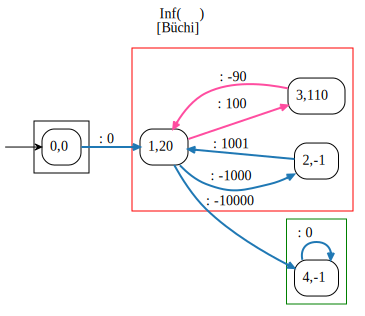

After pump 1


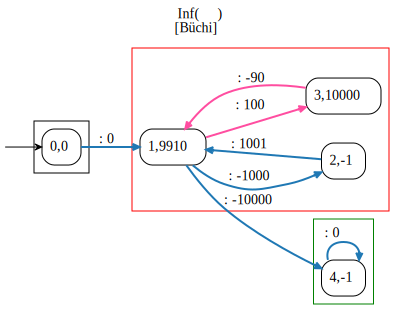

Iter 2
array('Q', [0, 5, 2, 3, 0])


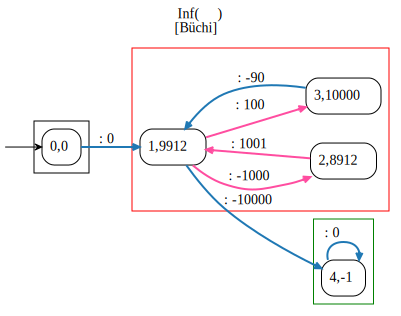

After pump 3


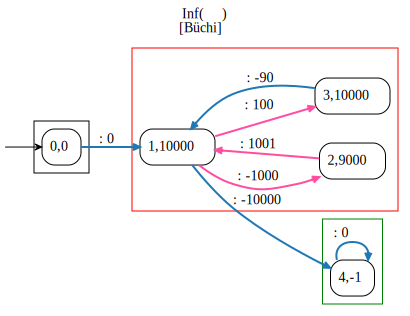

Iter 4
array('Q', [0, 5, 2, 3, 4])


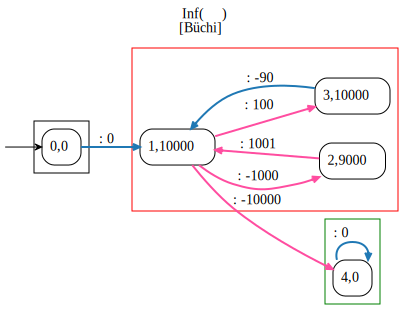

{'n_backedges': 0, 'n_bf_iter': 3, 'n_scc': 0, 'n_pump_loop': 2, 'n_propagate': 30}


In [12]:
WBA_utils.reset_stats()
aut3_comp = WBA_utils.mod_BF_iter(aut3)
for i, (e,p) in enumerate(aut3_comp.FindMaxEnergyGen(0, 10000, 0)):
    print(f"Iter {i}" if (i%2==0) else f"After pump {i}")
    if i%2 == 0:
        print(p)
    highlight_c(aut3, e, p, "tsbrg")
print(WBA_utils.get_stats())

Very similar to the initial one, however here, both loops need to be pumped